<a href="https://colab.research.google.com/github/BharathiDhereddy/FakeNews_Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
#Importing Dataset
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake["class"] = "fake"
data_true["class"] = "true"


In [ ]:
# Now, we will look at the shape of both the dataset
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
# We will remove the last 10 rows for manual testing
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0, inplace = True)
# Let's have a look at the change in the shape of both the dataset
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
#Inserting the class column in both of the manual testing datasets
data_fake_manual_testing["class"] = "fake"
data_true_manual_testing["class"] = "true"

<ipython-input-7-572d338c82ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = "fake"
<ipython-input-7-572d338c82ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = "true"


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",fake
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",fake
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",fake
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",fake
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",fake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


Merging True and Fake Dataframes

In [ ]:
data = pd.concat([data_fake,data_true], axis =0 )
data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [ ]:
# We will remove the columns that are required for us
#data = data_merge.drop(["title", "subject","date"], axis = 1)

# Let's check if there are any null values in the dataset
#data.isnull().sum()

In [ ]:
# Here is the random shuffling of the rows in dataset
#data = data.sample(frac = 1)
#data.head()

In [ ]:
#Here, we have created the randomness in the dataset by shuffling the rows.

#If you have noticed the indexing has been messed up, we will look for it.
#data.reset_index(inplace = True)
#data.drop(["index"], axis = 1, inplace = True)
#data.head()

In [ ]:
#Function to Process the Texts
#Here we will create a function that can process the texts in the news so that it is understandable for algorithms.

def wordopt(t):
    tt = t.lower()
    t = re.sub('\[.*?\]', '', t)
    t = re.sub("\\W"," ",t)
    t = re.sub('https?://\S+|www\.\S+', '', t)
    t = re.sub('<.*?>+', '', t)
    t = re.sub('[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub('\n', '', t)
    t = re.sub('\w*\d\w*', '', t)
    return t

In [ ]:
data["text"] = data["text"].apply(wordopt)

#Now we will define the dependent variable and independent variables
x = data["text"]
y = data["class"]

# Splitting the Dataset into a Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
#Convert Text to Vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

Modelling

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9867201426024955

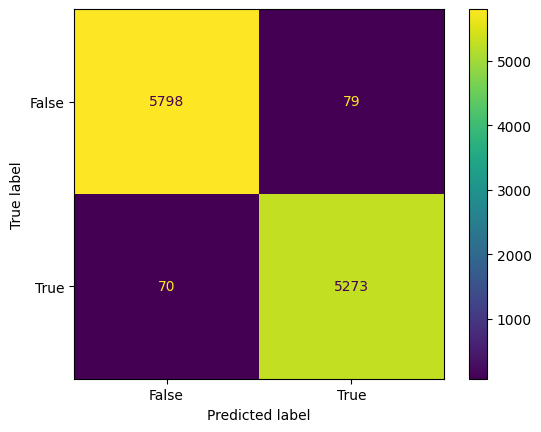

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5877
        true       0.99      0.99      0.99      5343

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9958110516934047

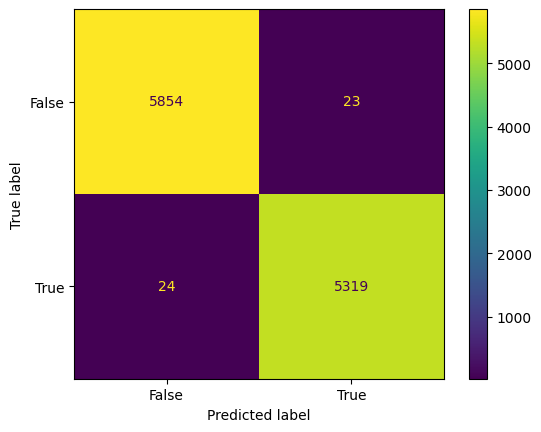

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      5877
        true       1.00      1.00      1.00      5343

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



3. Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.9951871657754011

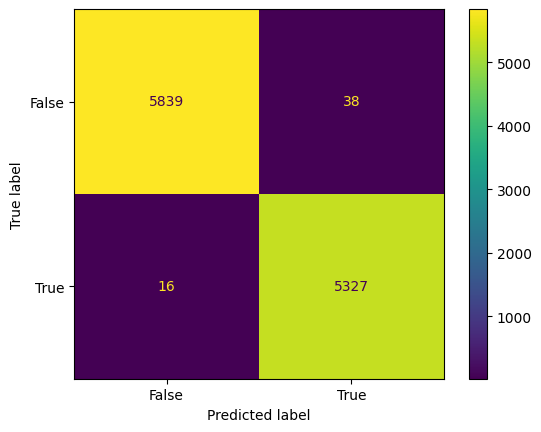

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_gbc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      5877
        true       0.99      1.00      0.99      5343

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



4. Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9900178253119429

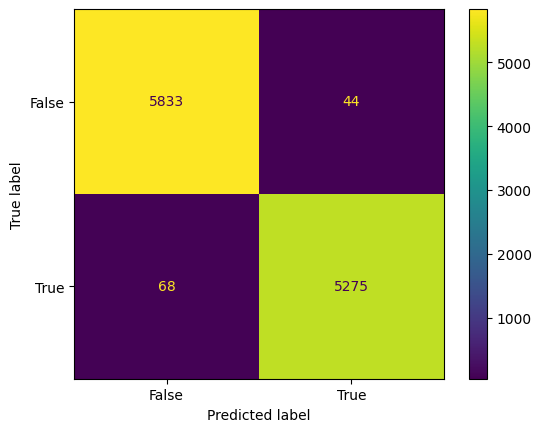

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5877
        true       0.99      0.99      0.99      5343

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



5.Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [ ]:
pred_NB = NB.predict(xv_test)
NB.score(xv_test, y_test)

0.9394830659536542

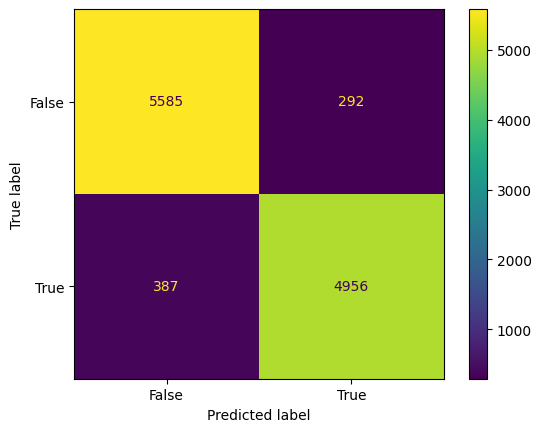

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_NB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

6.SVM

In [ ]:
from sklearn.svm import LinearSVC
# Create a LinearSVC classifier
clf = LinearSVC(C=1.0, random_state=42, max_iter=1000)  # You may need to adjust max_iter based on your dataset
# Fit the classifier to the training data
clf.fit(xv_train, y_train)

LinearSVC(random_state=42)

In [ ]:
pred_svm = clf.predict(xv_test)
clf.score(xv_test, y_test)

0.9944741532976827

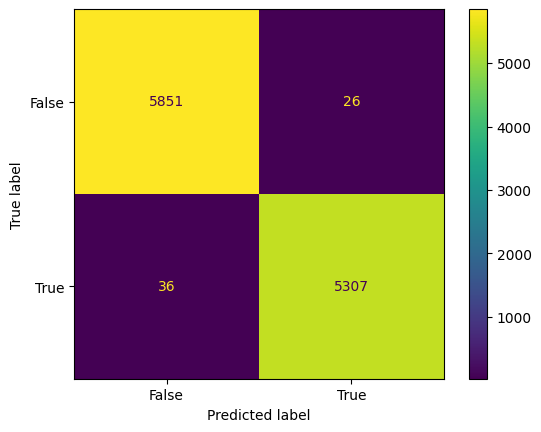

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

Basic data exploration

subject
politicsNews    11272
worldnews       10135
Name: text, dtype: int64


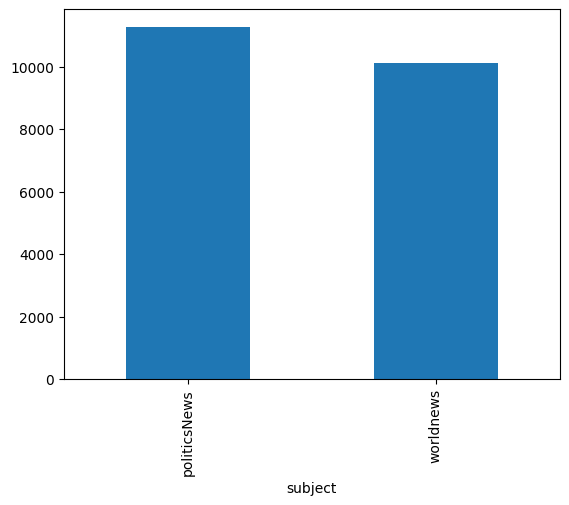

In [ ]:
# How many articles per subject?
print(data_true.groupby(['subject'])['text'].count())
data_true.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News    1570
Middle-east         768
News               9050
US_News             783
left-news          4459
politics           6841
Name: text, dtype: int64


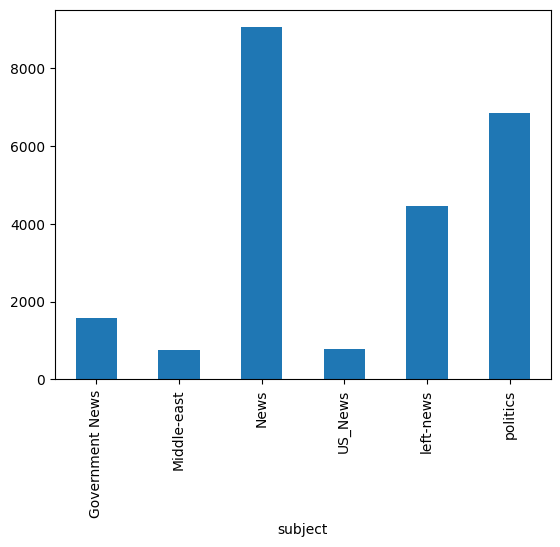

In [ ]:
# How many articles per subject?
print(data_fake.groupby(['subject'])['text'].count())
data_fake.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


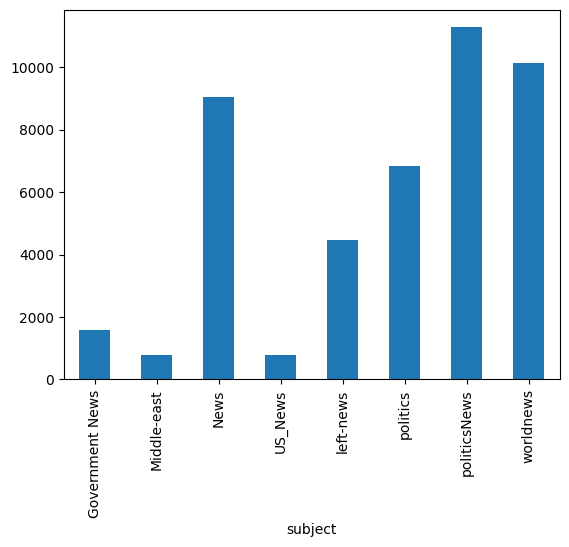

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class
fake    23471
true    21407
Name: text, dtype: int64


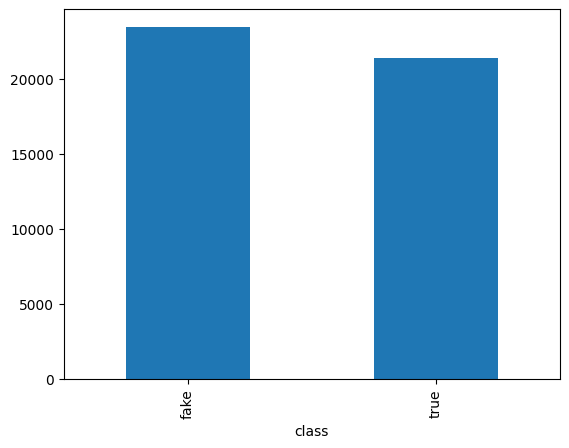

In [ ]:
# How many fake and real articles?
print(data.groupby(['class'])['text'].count())
data.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

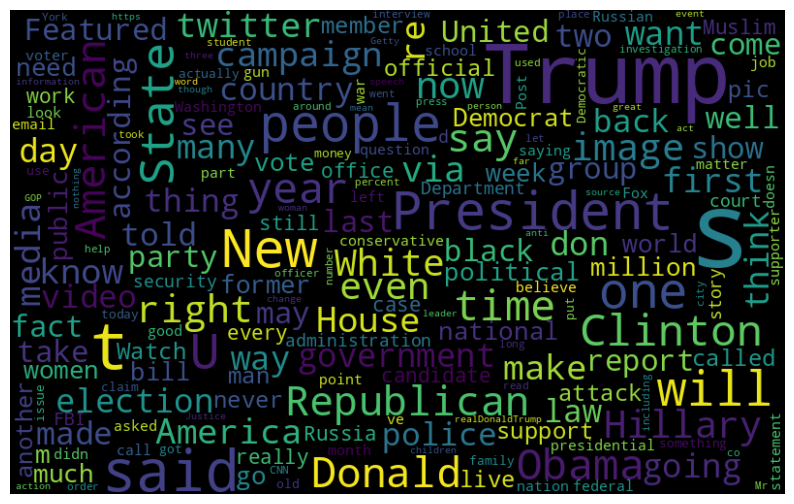

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud
fake_data = data[data["class"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

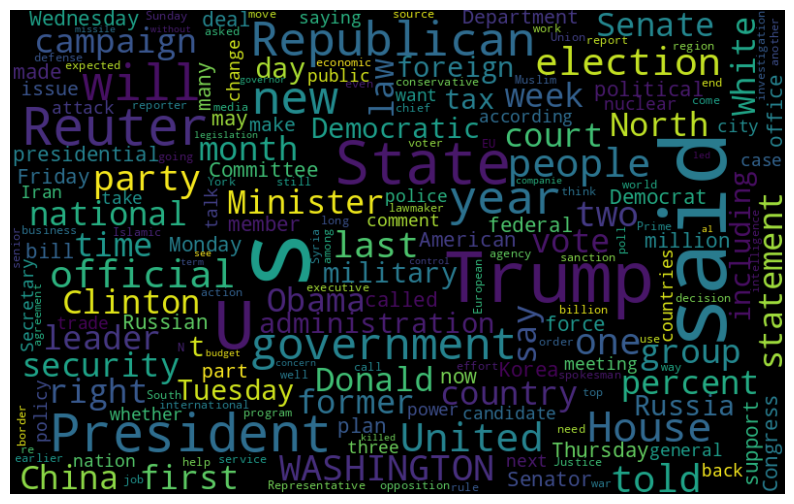

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["class"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize
import nltk
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

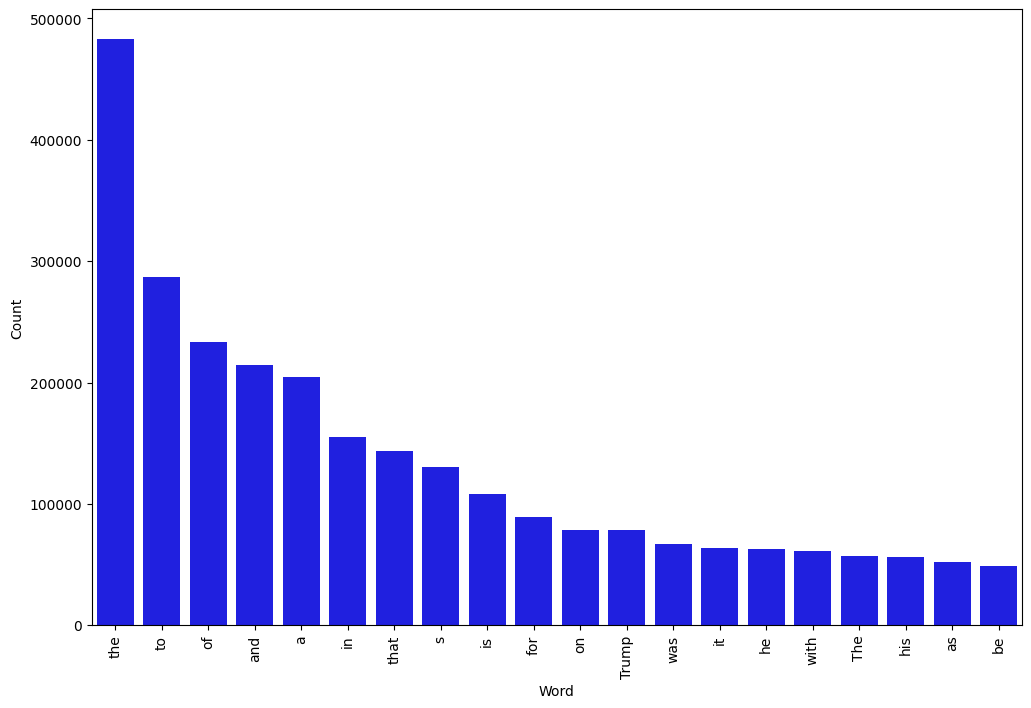

In [ ]:
# Most frequent words in fake news
counter(data[data["class"] == "fake"], "text", 20)

In [ ]:
# Most frequent words in real news
counter(data[data["class"] == "true"], "text", 20)

Model Testing

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)


    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

news = str(input())
manual_testing(news)